<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #131842; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The data Columns :</font></h3>
    
We're studying to predict which customers respond positively to an automobile insurance offer.
    
**Gender**: Categorical variable indicating the gender of the customer.
    
**Age**: Numeric variable indicating the age of the customer.
    
**Driving_License**: Binary variable indicating if the customer has a driving license (1 if yes, 0 if no).
    
**Region_Code**: Numeric variable indicating the region code of the customer.
    
**Previously_Insured**: Binary variable indicating if the customer was previously insured (1 if yes, 0 if no).
    
**Vehicle_Age**: Categorical variable indicating the age of the vehicle.
    
**Vehicle_Damage**: Categorical variable indicating if the vehicle was damaged in the past.
    
**Annual_Premium**: Numeric variable indicating the annual premium amount.
    
**Policy_Sales_Channel**: Numeric variable indicating the sales channel of the policy.
    
**Vintage**: Numeric variable indicating the number of days the customer has been associated with the company.
    
**Response**: Binary target variable indicating if the customer responded positively to the automobile insurance offer (1 if yes, 0 if no).

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #131842; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Task**: The objective of this competition is to predict which customers respond positively to an automobile insurance offer..

**Dataset**: The dataset for this competition (both train and test) was generated from a deep learning model trained on the Health Insurance Cross Sell Prediction Data dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

**Evaluation**: Submissions are evaluated using area under the ROC curve.

**Submission**: train.csv - the training dataset; Response is the binary target
test.csv - the test dataset; your objective is to predict the probability of Response for each row
sample_submission.csv - a sample submission file in the correct format

<div class="alert alert-success"> 
        <h1 align="center" style="color:blue;">About ROC curve</h1>  
     
</div>

<div>

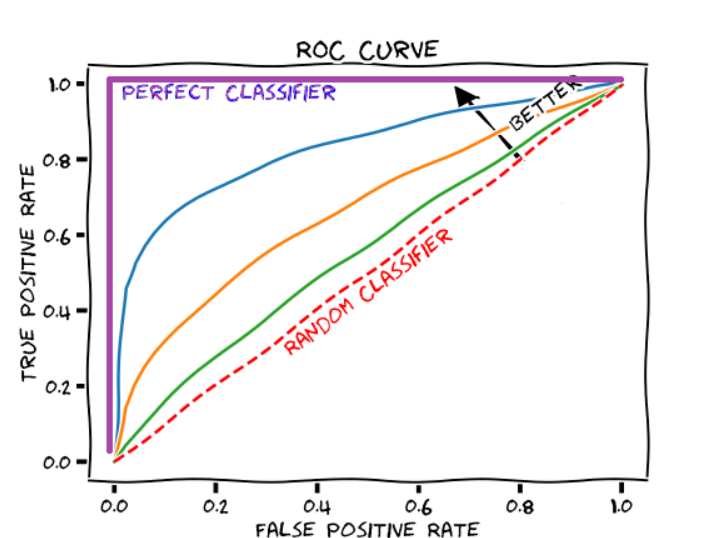

</div>

<div class="alert alert-success"> 
        <h1 align="center" style="color:blue;">Import Necessary Libraries</h1>  
     
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-success"> 
        <h1 align="center" style="color:blue;">Read The Data</h1>  
     
</div>

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
df.drop(["id"], axis=1, inplace=True)

<div class="alert alert-success"> 
        <h1 align="center" style="color:blue;">Sanity Check of Data</h1>  
     
</div>

In [10]:
print("the shape of data: ", df.shape)

the shape of data:  (11504798, 11)


In [11]:
# to get the data types or column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 965.5+ MB


In [12]:
# to get the number of missing values
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

No Missing Values

In [13]:
# find duplicates
df.duplicated().sum()

0

No Duplicates

In [14]:
# identifing garbage values
for i in df.select_dtypes(include="object").columns:
	print(df[i].value_counts())
	print("***" * 10)

Gender
Male      6228134
Female    5276664
Name: count, dtype: int64
******************************
Vehicle_Age
1-2 Year     5982678
< 1 Year     5044145
> 2 Years     477975
Name: count, dtype: int64
******************************
Vehicle_Damage
Yes    5783229
No     5721569
Name: count, dtype: int64
******************************


<div class="alert alert-success"> 
        <h1 align="center" style="color:blue;">Exploratory Data Analysis (EDA)</h1>  
     
</div>

In [15]:
# descriptive statistics
numerical_summary = df.describe().transpose()

palette = sns.color_palette("viridis", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Age,11504798.000000,38.383563,14.993459,20.000000,24.000000,36.000000,49.000000,85.000000
Driving_License,11504798.000000,0.998022,0.044431,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,11504798.000000,26.418690,12.991590,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,11504798.000000,0.462997,0.498629,0.000000,0.000000,0.000000,1.000000,1.000000
Annual_Premium,11504798.000000,30461.370411,16454.745205,2630.000000,25277.000000,31824.000000,39451.000000,540165.000000
Policy_Sales_Channel,11504798.000000,112.425442,54.035708,1.000000,29.000000,151.000000,152.000000,163.000000
Vintage,11504798.000000,163.897744,79.979531,10.000000,99.000000,166.000000,232.000000,299.000000
Response,11504798.000000,0.122997,0.328434,0.000000,0.000000,0.000000,0.000000,1.000000


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #131842; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>

**Age Distribution:**
The age of customers ranges from **20 to 85 years**, with an **average age of approximately 38.38 years**.
This suggests a **wide age range** among the customers, which might **influence their insurance needs and responses**.
    
**Driving License:**
Almost all **customers have a driving license**, with a mean value of 0.998.
This indicates that very **few customers do not have a driving license**.
    
**Region Code:**
**Region codes vary from 0 to 52**, with a mean value of 26.42.
This suggests that **customers are spread across different regions**, which might have **varying risk profiles and insurance needs**.
    
**Previously Insured:**
About **46.3% of customers were previously insured**, as **indicated by the mean value of 0.463**.
This could impact their **likelihood of responding positively to a new insurance offer**.
    
**Annual Premium:**
The **annual premium amounts range from 2,630 to 540,165**, with an **average of 30,461.37**.
The large **standard deviation of 16,454.75 indicates significant variability in the premium amounts paid** by customers.
    
**Policy Sales Channel:**
The **policy sales channels range from 1 to 163**, with a mean value of 112.43.
This suggests a **wide variety of sales channels used, which might influence customer responses**.
    
**Vintage:**
The average vintage **(number of days the customer has been associated with the company) is approximately 163.90 days**, ranging from **10 to 299 days**.
**Customers' tenure with the company might affect their loyalty** and response to offers.
    
**Response:**
The target variable Response has a mean value of 0.123, **indicating that about 12.3% of customers responded positively to the automobile insurance offer**.
**This suggests an imbalanced dataset where the majority of customers did not respond positively**, **which is important to consider during modeling.**

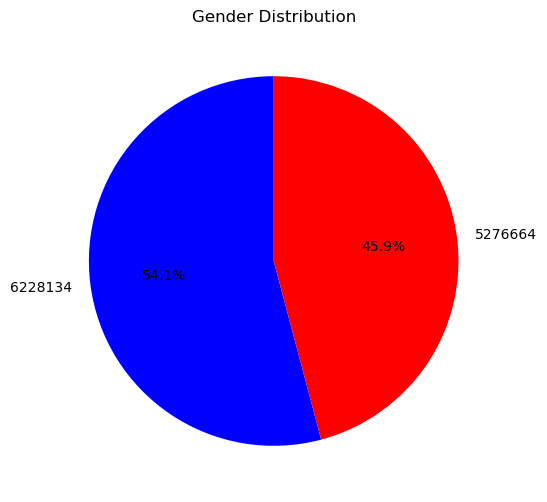

In [16]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts, autopct='%1.1f%%', colors=['blue', 'red'], startangle=90)
plt.title('Gender Distribution')
plt.show()

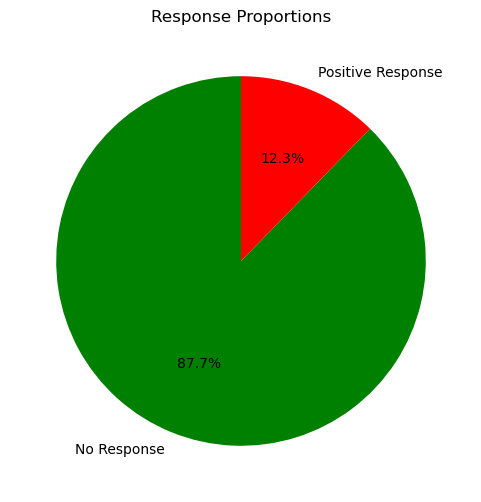

In [18]:
response_counts = df['Response'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(response_counts, labels=['No Response', 'Positive Response'], autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Response Proportions')
plt.show()

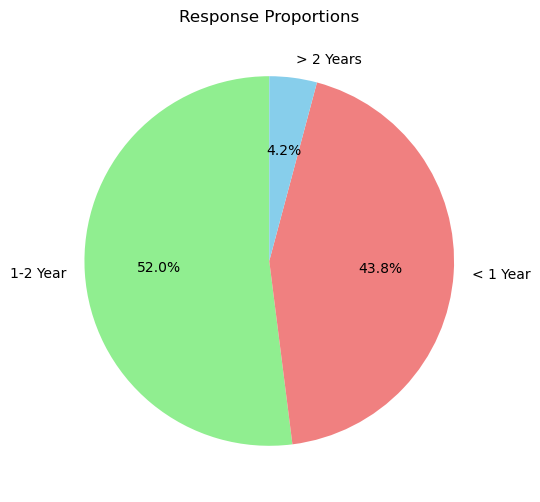

In [19]:
response_counts = df['Vehicle_Age'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(response_counts, labels=['1-2 Year', '< 1 Year', '> 2 Years'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'skyblue'], startangle=90)
plt.title('Response Proportions')
plt.show()

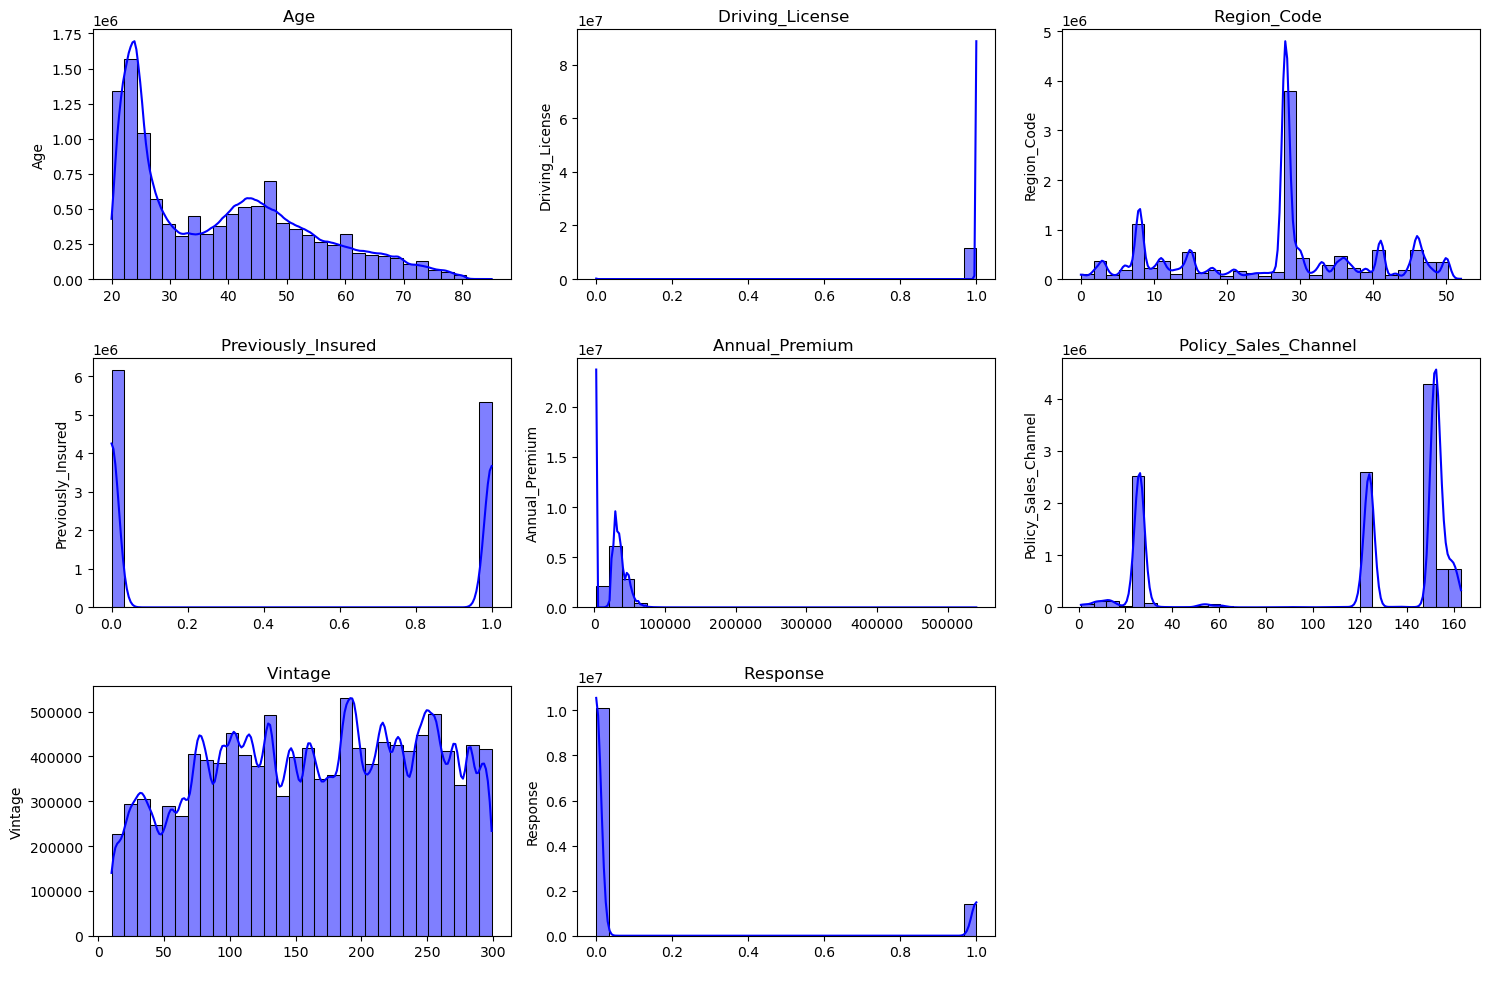

In [17]:
# histogram to understand the distribution
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=feature, bins=30, kde=True, color='blue')
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

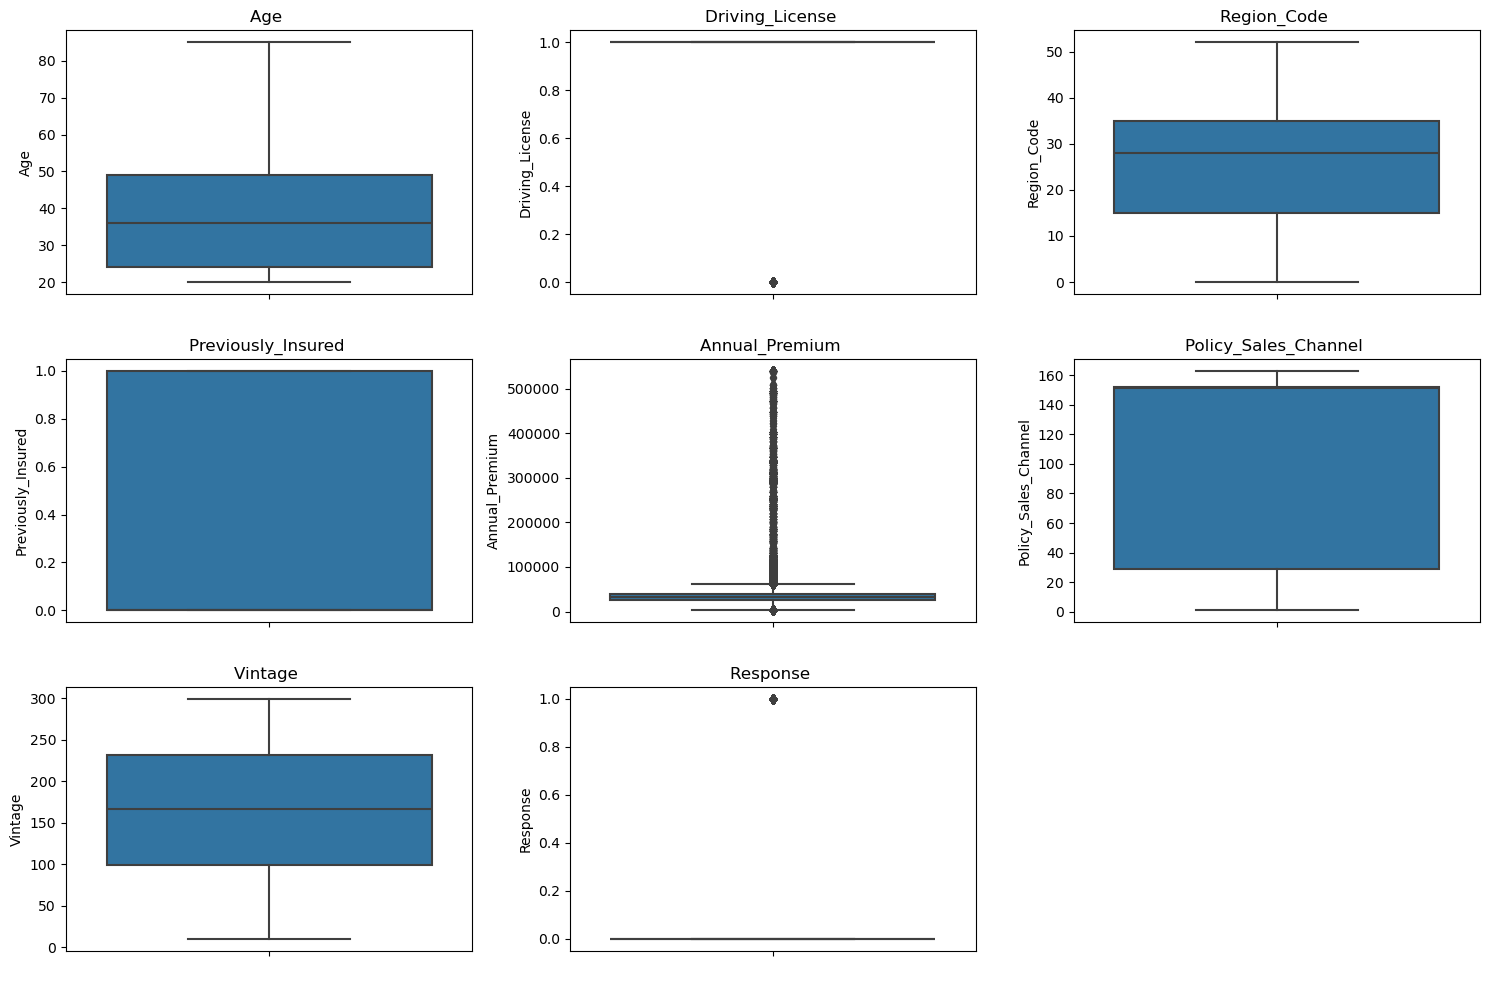

In [18]:
# boxplot in subplot
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, y=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

<div class="alert alert-success"> 
        <h1 align="center" style="color:blue;">Encoding</h1>  
     
</div>

In [5]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,0,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,1,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,1,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,1,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,0,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,1,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,1,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,1,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


In [6]:
df["Vehicle_Age"] = df["Vehicle_Age"].map({"1-2 Year": 0, "< 1 Year": 1, "> 2 Years": 2})
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,21,1,35.0,0,0,Yes,65101.0,124.0,187,0
1,0,43,1,28.0,0,2,Yes,58911.0,26.0,288,1
2,1,25,1,14.0,1,1,No,38043.0,152.0,254,0
3,1,35,1,1.0,0,0,Yes,2630.0,156.0,76,0
4,1,36,1,15.0,1,0,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,0,48,1,6.0,0,0,Yes,27412.0,26.0,218,0
11504794,1,26,1,36.0,0,1,Yes,29509.0,152.0,115,1
11504795,1,29,1,32.0,1,1,No,2630.0,152.0,189,0
11504796,1,51,1,28.0,0,0,Yes,48443.0,26.0,274,1


In [7]:
df["Vehicle_Damage"] = df["Vehicle_Damage"].map({"Yes": 1, "No": 0})
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,21,1,35.0,0,0,1,65101.0,124.0,187,0
1,0,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,1,25,1,14.0,1,1,0,38043.0,152.0,254,0
3,1,35,1,1.0,0,0,1,2630.0,156.0,76,0
4,1,36,1,15.0,1,0,0,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,0,48,1,6.0,0,0,1,27412.0,26.0,218,0
11504794,1,26,1,36.0,0,1,1,29509.0,152.0,115,1
11504795,1,29,1,32.0,1,1,0,2630.0,152.0,189,0
11504796,1,51,1,28.0,0,0,1,48443.0,26.0,274,1


<div class="alert alert-success"> 
        <h1 align="center" style="color:blue;">Correlation Matrix</h1>  
     
</div>

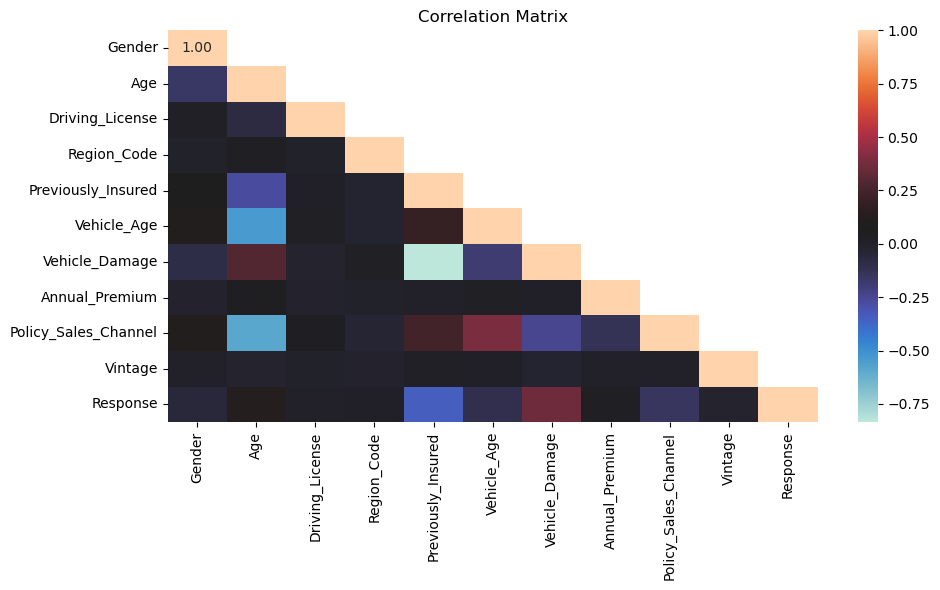

In [26]:
# Plotting a correlation matrix to see the relationship between variables and price
corr = df.corr()
mask_ut = np.triu(np.ones(corr.shape), k=1).astype(bool)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [27]:
palette = sns.color_palette("viridis", as_cmap=True)

corr.style.background_gradient(cmap=palette)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,-0.157663,0.018702,0.000106,0.087614,0.117661,-0.096989,-0.010652,0.116058,0.009535,-0.055212
Age,-0.157663,1.000000,-0.078519,0.037041,-0.276248,-0.537738,0.287952,0.056327,-0.591443,-0.013293,0.122134
Driving_License,0.018702,-0.078519,1.000000,-0.001329,0.013733,0.029308,-0.015563,-0.007300,0.042941,-0.000697,0.009197
Region_Code,0.000106,0.037041,-0.001329,1.000000,-0.022367,-0.023707,0.026468,-0.001741,-0.037606,-0.005537,0.012816
Previously_Insured,0.087614,-0.276248,0.013733,-0.022367,1.000000,0.191106,-0.836214,0.007665,0.236838,0.019431,-0.345930
Vehicle_Age,0.117661,-0.537738,0.029308,-0.023707,0.191106,1.000000,-0.189672,0.029708,0.395323,0.013875,-0.111630
Vehicle_Damage,-0.096989,0.287952,-0.015563,0.026468,-0.836214,-0.189672,1.000000,0.012728,-0.241036,-0.019393,0.359780
Annual_Premium,-0.010652,0.056327,-0.007300,-0.001741,0.007665,0.029708,0.012728,1.000000,-0.128559,0.003284,0.032261
Policy_Sales_Channel,0.116058,-0.591443,0.042941,-0.037606,0.236838,0.395323,-0.241036,-0.128559,1.000000,0.008999,-0.152733
Vintage,0.009535,-0.013293,-0.000697,-0.005537,0.019431,0.013875,-0.019393,0.003284,0.008999,1.000000,-0.015177


<div class="alert alert-success"> 
        <h1 align="center" style="color:blue;">Outlier Treatment</h1>  
     
</div>

In [8]:
max_limit = df.Annual_Premium.mean() + 2 * df.Annual_Premium.std()
min_limit = df.Annual_Premium.mean() - 4 * df.Annual_Premium.std()


df = df[(df.Annual_Premium > min_limit) & (df.Annual_Premium < max_limit)]

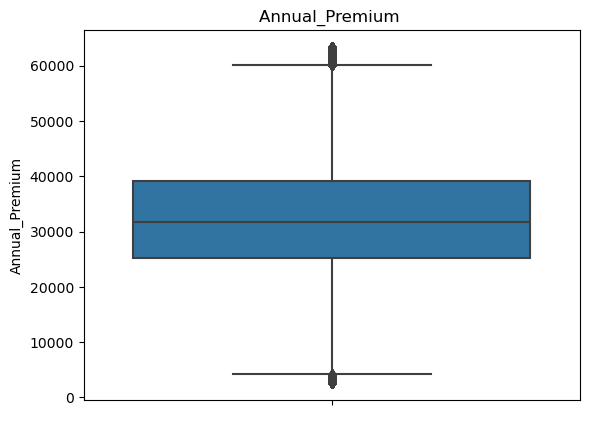

In [37]:
sns.boxplot(data=df["Annual_Premium"], y=df["Annual_Premium"])
plt.title('Annual_Premium ')
plt.xlabel(' ')
plt.ylabel('Annual_Premium')
plt.show()

In [38]:
df.shape

(11329278, 11)

<div class="alert alert-success"> 
        <h1 align="center" style="color:blue;">Feature Selection</h1>  
     
</div>

In [9]:
X = df.drop(["Response"], axis=1)
y = df["Response"]

In [40]:
k_best = SelectKBest(score_func=chi2, k=10)

X = k_best.fit_transform(X, y)

<div class="alert alert-success"> 
        <h1 align="center" style="color:blue;">Handeling Inbalance Data</h1>  
     
</div>

In [10]:
smote = SMOTE(sampling_strategy="minority")
X_sam, y_sam = smote.fit_resample(X,y)

y_sam.value_counts()

Response
1    9941766
0    9941766
Name: count, dtype: int64

In [12]:
X_sam.shape, y_sam.shape

((19883532, 10), (19883532,))

In [15]:
X = pd.DataFrame(X_sam, columns=df.drop(["Response"], axis=1).columns)
y = pd.Series(y_sam)

<div class="alert alert-success"> 
        <h1 align="center" style="color:blue;">Train Test Split</h1>  
     
</div>

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15906825, 10), (3976707, 10), (15906825,), (3976707,))

<div class="alert alert-success"> 
        <h1 align="center" style="color:blue;">Model Building</h1>  
     
</div>

In [14]:
# with DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)

In [17]:
# with RandomForestClassifier
# rf_model = RandomForestClassifier(random_state=42)

# rf_model.fit(x_train, y_train)

# y_pred_rf = rf_model.predict(x_test)

In [15]:
# with LGBMClassifier
lgbm_model = LGBMClassifier()

lgbm_model.fit(x_train, y_train)

y_pred_lgbm = lgbm_model.predict(x_test)

  File "d:\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Number of positive: 1110010, number of negative: 7953412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 735
[LightGBM] [Info] Number of data points in the train set: 9063422, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122471 -> initscore=-1.969232
[LightGBM] [Info] Start training from score -1.969232


In [17]:
# with XGBClassifier
xgb_model = XGBClassifier()

xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

<div class="alert alert-success"> 
        <h1 align="center" style="color:blue;">Evaluation</h1>  
     
</div>

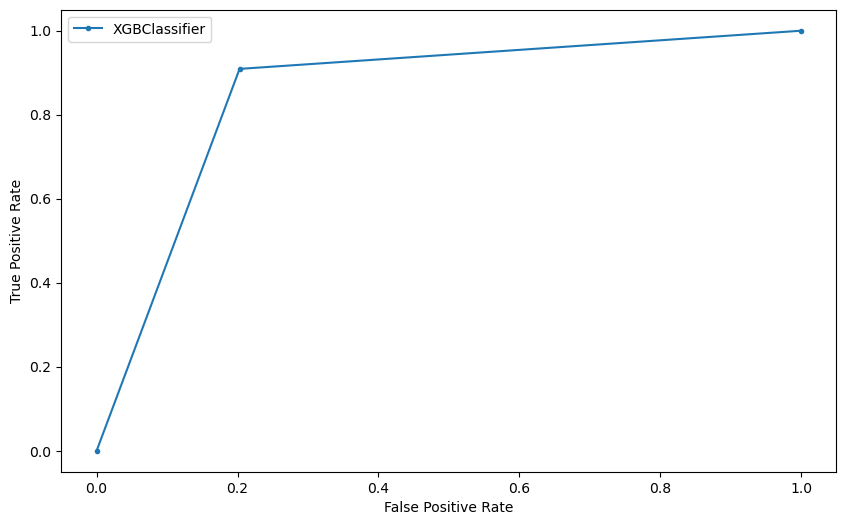

In [18]:
# evaluate the model
def evaluate_model(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    return fpr, tpr, auc

# fpr_dt, tpr_dt, auc_dt = evaluate_model(y_test, y_pred_dt)
# fpr_lgbm, tpr_lgbm, auc_lgbm = evaluate_model(y_test, y_pred_lgbm)
fpr_xgb, tpr_xgb, auc_xgb = evaluate_model(y_test, y_pred_xgb)

# plot the roc curve for the model
plt.figure(figsize=(10, 6))
# plt.plot(fpr_dt, tpr_dt, linestyle='--', label='DecisionTreeClassifier')
# plt.plot(fpr_lgbm, tpr_lgbm, marker='.', label='LGBMClassifier')
plt.plot(fpr_xgb, tpr_xgb, marker='.', label='XGBClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [19]:
auc_xgb

0.8531242196141476